In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
import pandas as pd
import copy

In [3]:
data = pd.read_csv('Our Bank customer data.csv')

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,NaN
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,NaN
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,NaN
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,NaN
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,NaN


In [5]:
string_column_names = data.columns[data.dtypes=='object']

In [6]:
for columns in string_column_names:
    data[columns + '_code'] = data[columns].astype('category').cat.codes

In [7]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21', 'Attrition_Flag_code', 'Gender_code',
       'Education_Level_code', 'Marital_Status_code', 'Income_Category_code',
       'Card_Category_code'],
      dtype='object')

In [8]:
data['Attr_code'] = data.Attrition_Flag.astype('category').cat.codes

In [9]:
data.head(100)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21,Attrition_Flag_code,Gender_code,Education_Level_code,Marital_Status_code,Income_Category_code,Card_Category_code,Attr_code
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,NaN,1,1,3,1,2,0,1
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,NaN,1,0,2,2,4,0,1
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,NaN,1,1,2,1,3,0,1
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,NaN,1,0,3,3,4,0,1
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,NaN,1,1,5,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,719712633,Existing Customer,64,M,1,Graduate,Married,Less than $40K,Blue,52,...,0.882,0.524,NaN,1,1,2,1,4,0,1
96,772629333,Existing Customer,45,M,3,Graduate,Married,$40K - $60K,Blue,35,...,0.304,0.347,NaN,1,1,2,1,1,0,1
97,720336708,Existing Customer,53,M,3,Doctorate,Married,$40K - $60K,Blue,35,...,0.680,0.450,NaN,1,1,1,1,1,0,1
98,802013583,Existing Customer,56,M,3,College,Married,$120K +,Blue,50,...,0.727,0.232,NaN,1,1,0,1,0,0,1


In [10]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21', 'Attrition_Flag_code', 'Gender_code',
       'Education_Level_code', 'Marital_Status_code', 'Income_Category_code',
       'Card_Category_code', 'Attr_code'],
      dtype='object')

In [11]:
y = data['Attr_code']

In [12]:
y

0        1
1        1
2        1
3        1
4        1
        ..
10122    1
10123    0
10124    0
10125    0
10126    0
Name: Attr_code, Length: 10127, dtype: int8

In [13]:
data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Unnamed: 21', 'Attrition_Flag_code', 'Gender_code',
       'Education_Level_code', 'Marital_Status_code', 'Income_Category_code',
       'Card_Category_code', 'Attr_code'],
      dtype='object')

In [14]:
data.drop(string_column_names, inplace=True, axis=1)
data.drop('Unnamed: 21', inplace=True, axis=1)

In [15]:
data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_code', 'Gender_code', 'Education_Level_code',
       'Marital_Status_code', 'Income_Category_code', 'Card_Category_code',
       'Attr_code'],
      dtype='object')

In [16]:
data.drop('Attr_code',inplace=True, axis=1)

In [17]:
data.drop('CLIENTNUM',inplace=True, axis=1)

In [18]:
data.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_code', 'Gender_code', 'Education_Level_code',
       'Marital_Status_code', 'Income_Category_code', 'Card_Category_code'],
      dtype='object')

In [19]:
x=data

In [20]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_code', 'Gender_code', 'Education_Level_code',
       'Marital_Status_code', 'Income_Category_code', 'Card_Category_code'],
      dtype='object')

In [21]:
logmodel = LogisticRegression(class_weight = 'balanced')

In [22]:
logmodel.fit(x,y)

C:\Users\swath\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [23]:
logmodel.score(x,y)

0.8625456699911128

In [24]:
data['predicted_attrition'] = logmodel.predict(x)

In [25]:
data['predicted_attrition'].value_counts()

1    7554
0    2573
Name: predicted_attrition, dtype: int64

In [26]:
data.to_csv('final_predicted_data.csv', header=True, index=False)

In [28]:
x.columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_code', 'Gender_code', 'Education_Level_code',
       'Marital_Status_code', 'Income_Category_code', 'Card_Category_code',
       'predicted_attrition'],
      dtype='object')

In [29]:
original_df = x[['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Attrition_Flag_code', 'Gender_code', 'Education_Level_code',
       'Marital_Status_code', 'Income_Category_code', 'Card_Category_code']]

In [30]:
confusion_matrix(y, logmodel.predict(original_df))

array([[1404,  223],
       [1169, 7331]], dtype=int64)

In [31]:
cm = confusion_matrix(y, logmodel.predict(original_df))

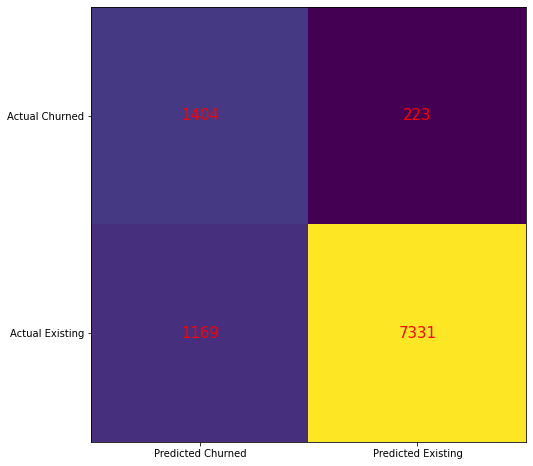

In [41]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Churned', 'Predicted Existing'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Churned', 'Actual Existing'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red',fontsize=15)
plt.show()

The above matrix explains that 
1404 customers who churned, the model predicted that the same number of customers churned.
223 customers who churned ,the model predicted that they would be existing.
1169 customers who existed, the model predicted that these customers would churn.
7331 customers who are still existing with the bank, the model predicted these customers would remain with the bank.